# Zadanie 2

## Zaimportuj pakiet Tidiverse

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


##Wczytaj plik
przygotowany na poprzednich zajęciach new_cocoa_imie_nazwisko.csv

In [9]:
df <- read_csv("new_cocoa_dominik_sieron.csv")

df$Company <- as.factor(df$Company)
df$Specific_Bean_Origin_or_Bar_Name <- as.factor(df$Specific_Bean_Origin_or_Bar_Name)
df$Company_Location <- as.factor(df$Company_Location)

head(df, 10)

Rows: 1795 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Company, Specific_Bean_Origin_or_Bar_Name, Company_Location, Broad_...
dbl (4): REF, Review_Date, Cocoa_Percentage, Rating
lgl (1): is_bitter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Broad_Bean_Origin,is_bitter
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<lgl>
A. Morin,Agua Grande,1876,2016,63,France,3.75,Sao Tome,FALSE
A. Morin,Kpime,1676,2015,70,France,2.75,Togo,TRUE
A. Morin,Atsane,1676,2015,70,France,3.00,Togo,TRUE
A. Morin,Akata,1680,2015,70,France,3.50,Togo,TRUE
A. Morin,Quilla,1704,2015,70,France,3.50,Peru,TRUE
A. Morin,Carenero,1315,2014,70,France,2.75,Venezuela,TRUE
A. Morin,Cuba,1315,2014,70,France,3.50,Cuba,TRUE
A. Morin,Sur del Lago,1315,2014,70,France,3.50,Venezuela,TRUE
A. Morin,Puerto Cabello,1319,2014,70,France,3.75,Venezuela,TRUE


## Statystyki opisowe i tabele liczności

Oblicz postawowe statystyki opisowe dla zmiennych numerycznych oraz tabele liczności dla zmiennych kategorycznych

In [10]:
summary(df)

     Company       Specific_Bean_Origin_or_Bar_Name      REF      
 Soma    :  47   Madagascar        :  57            Min.   :   5  
 Bonnat  :  27   Peru              :  45            1st Qu.: 576  
 Fresco  :  26   Ecuador           :  42            Median :1069  
 Pralus  :  25   Dominican Republic:  37            Mean   :1036  
 A. Morin:  23   Venezuela         :  21            3rd Qu.:1502  
 Arete   :  22   Chuao             :  19            Max.   :1952  
 (Other) :1625   (Other)           :1574                          
  Review_Date   Cocoa_Percentage Company_Location     Rating     
 Min.   :2006   Min.   : 42.0    U.S.A. :764      Min.   :1.000  
 1st Qu.:2010   1st Qu.: 70.0    France :156      1st Qu.:2.875  
 Median :2013   Median : 70.0    Canada :125      Median :3.250  
 Mean   :2012   Mean   : 71.7    U.K.   : 96      Mean   :3.186  
 3rd Qu.:2015   3rd Qu.: 75.0    Italy  : 63      3rd Qu.:3.500  
 Max.   :2017   Max.   :100.0    Ecuador: 54      Max.   :5.000  
  

In [11]:
count(df, Rating)

Rating,n
<dbl>,<int>
1.00,4
1.50,10
1.75,3
2.00,32
2.25,14
2.50,127
2.75,259
3.00,341
3.25,303


Wykonaj histogram dla zmiennej *Rating*

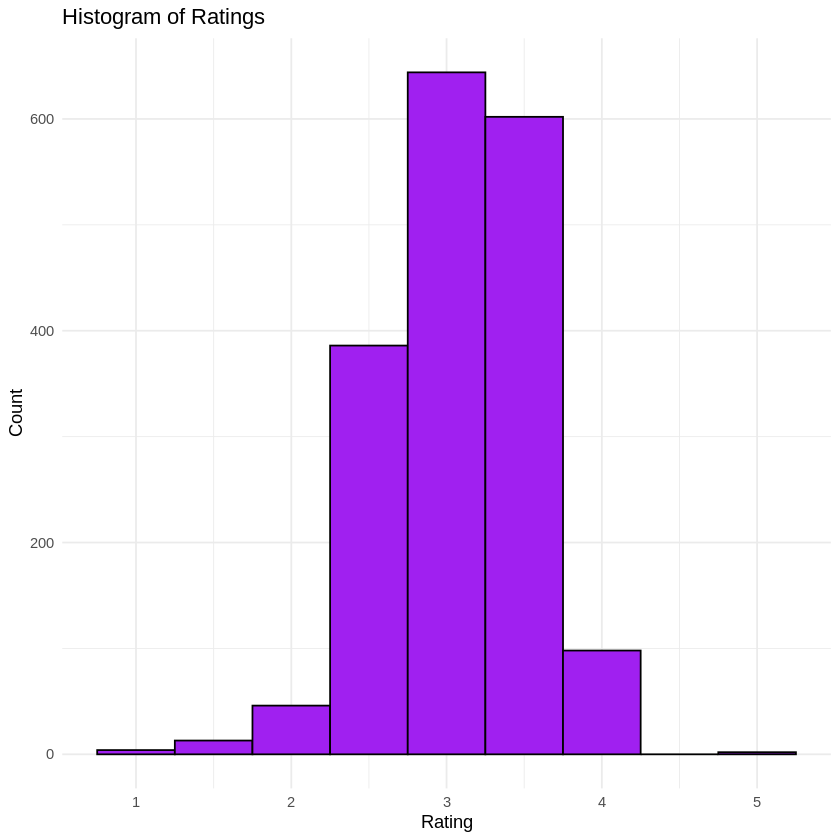

In [12]:
ggplot(df, aes(x = Rating)) +
        geom_histogram(binwidth = 0.5, fill="purple", color="black") +
        theme_minimal() +
        labs(title = "Histogram of Ratings", x = "Rating", y = "Count")

## EDA (Exploratory Data Analysis)
Przeprowadź eksploracyjną analizę danych. Spróbuj zaprezentować tak dane (wykresy lub tabele) aby odpowiedzieć na postawione poniżej pytania.

## PYTANIE 1 - Który kraj jest największym producentem czekolady?

Company_Location,count.fields
<fct>,<int>
U.S.A.,764
France,156
Canada,125
U.K.,96
Italy,63


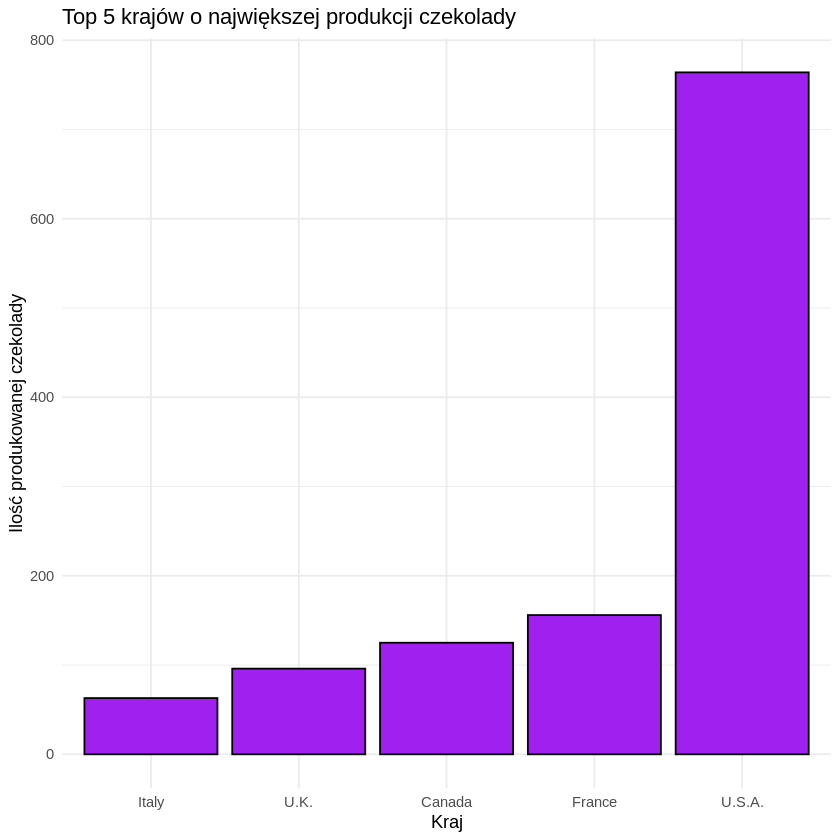

In [40]:
gb = group_by(df, Company_Location)
sm = arrange(summarise(gb, count.fields = n()), desc(count.fields))
top_sm <- head(sm, 5)
top_sm

ggplot(top_sm, aes(x=reorder(Company_Location, count.fields), y=count.fields)) +
  geom_bar(stat="identity", fill="purple", color="black") +
  labs(x="Kraj", y="Ilość produkowanej czekolady") +
  ggtitle("Top 5 krajów o największej produkcji czekolady") +
  theme_minimal()

# Według uzyskanych wyników największym producentem czekolady jest USA.


## PYTANIE 2 – Czy ocena zalezy od zawartości kakao w czekoladzie?

In [ ]:
cor(df$Rating, df$Cocoa_Percentage)

[1] -0.1648202

# Wynik ten oznacza, że istnieje niewielka negatywna korelacja pomiędzy tymim dwoma zmiennymi. Oznacza to, że związek pomiędzy tymi dwoma zmiennymi jest słaby i może być nieistotny statystycznie

## PYTANIE 3 - Jakie są trendy produkcji czekolady zwykłej i gorzkiej na rynku światowym? Czy któryś z tych rodzajów jest bardziej popularny?

# A tibble: 2 × 2
  count.fields Type  
         <int> <fct> 
1          328 Zwykła
2         1467 Gorzka


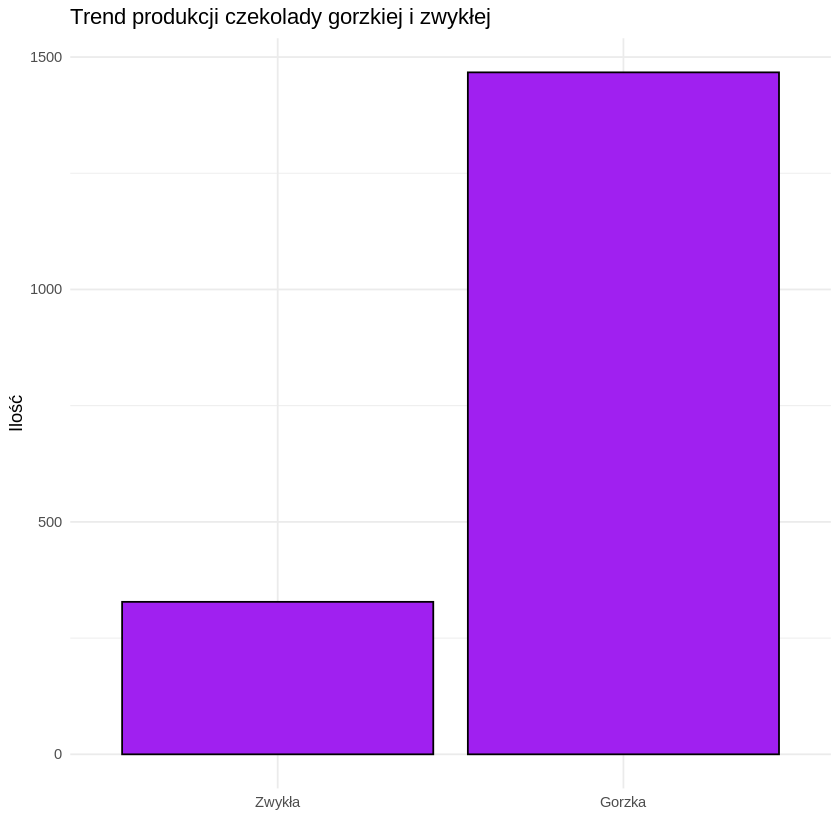

In [52]:
gb = group_by(df, is_bitter)
sm = summarise(gb, count.fields = n())
sm <- sm %>%
  mutate(Type = factor(is_bitter, labels = c("Zwykła", "Gorzka")))

sm %>%
  select(-is_bitter) %>%
  print()

ggplot(df, aes(x = is_bitter)) +
        geom_bar(fill="purple", color="black") +
        scale_x_discrete(labels=c("FALSE"="Zwykła", "TRUE"="Gorzka")) +
        theme_minimal() +
        labs(title = "Trend produkcji czekolady gorzkiej i zwykłej", x="", y = "Ilość")

# Z analizy wynika, że produkcja czekolady gorzkiej jest znacznie większa od czekolady zwykłej

## PYTANIE 4 - Który kraj ma najwyższe oceny czekolady?

Company_Location,Mean_Rating
<fct>,<dbl>
Chile,3.750000
Amsterdam,3.500000
Netherlands,3.500000
Philippines,3.500000
Iceland,3.416667
Vietnam,3.409091
Brazil,3.397059
Poland,3.375000
Australia,3.357143


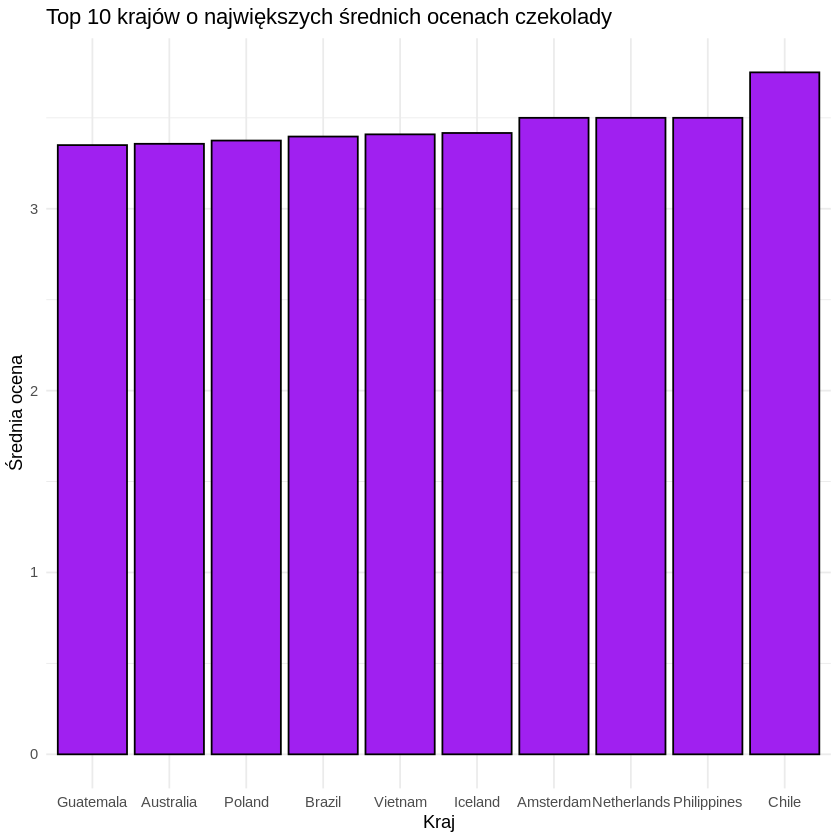

In [29]:
gb = group_by(df, Company_Location)
sm = arrange(summarise(gb, Mean_Rating = mean(Rating)), desc(Mean_Rating))

top_sm <- head(sm, n = 10)
top_sm

ggplot(top_sm, aes(x=reorder(Company_Location, Mean_Rating), y=Mean_Rating)) +
  geom_bar(stat="identity", fill="purple", color="black") +
  labs(x="Kraj", y="Średnia ocena") +
  ggtitle("Top 10 krajów o największych średnich ocenach czekolady") +
  theme_minimal()

# Z analizy wynika, że największe średnie oceny są dla Chile

## PYTANIE 6 – Jak zmieniały się oceny różnych rodzajów czekoladek na przestrzeni czasu?

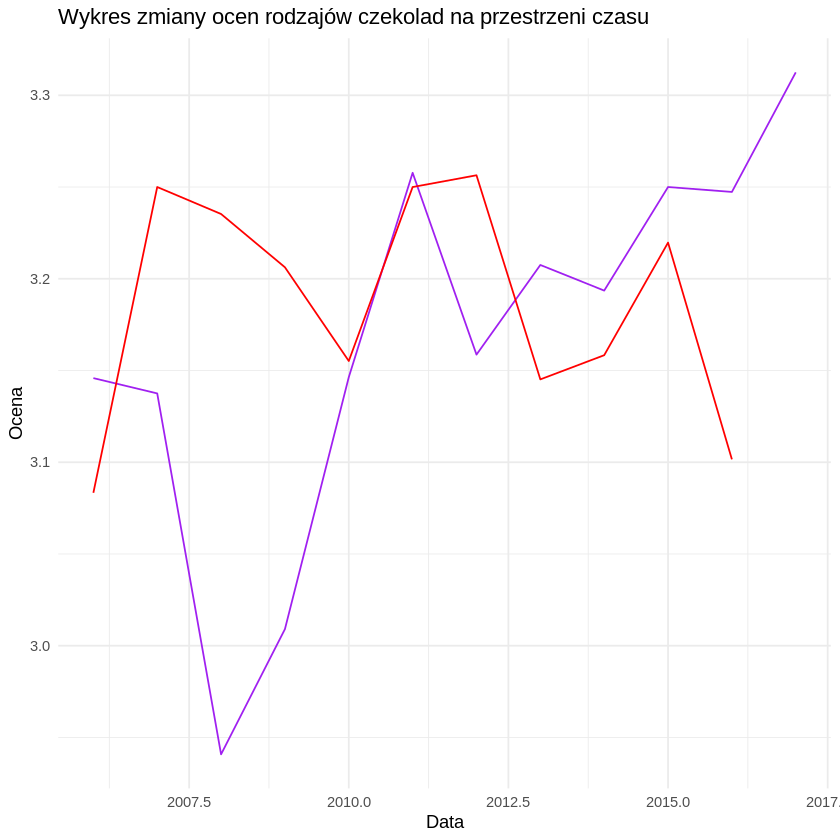

In [ ]:
bitter = filter(df, is_bitter)
not_bitter = filter(df, !is_bitter)

ggplot() +
  geom_line(bitter, mapping = aes(x=Review_Date, y=Rating), stat="summary", fun="mean", color="purple") +
  geom_line(not_bitter, mapping = aes(x=Review_Date, y=Rating), stat="summary", fun="mean", color="red") +
  theme_minimal() +
  labs(title="Wykres zmiany ocen rodzajów czekolad na przestrzeni czasu", x="Data", y="Ocena")


# Wykres przedstawia jak zmieniały się oceny czekolad na przestrzeni czasu dla odpowiednich rodzajów (gorzka i nie).
## Z wykresu możemy odczytać, że czekolada gorzka (kolor fioletowy) w latach 2007-2010 była znacznie niżej oceniana, ale z czasem zyskała na ocenie względem czekolady zwykłej